# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

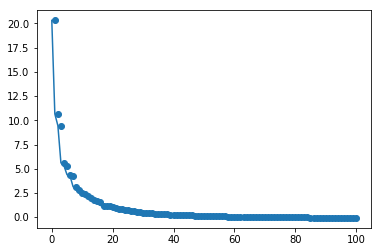

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)
indices = []
length = len(train_labels)
for i in range(length):
    if(train_labels[i] == 9):
        indices.append(i)
# for i in indices:
#     print (i)
data = []
for i in indices:
    data.append(train_data[i])
# print(len(data))

cova = np.cov(np.transpose(data))#because we want (600,784)
# print (cova.shape)

eigval,eigvec = np.linalg.eig(cova)
eigval=eigval.real
# print(eigvec.shape)
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

# print(eigval);
np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

# print(eigval.shape)



        
        


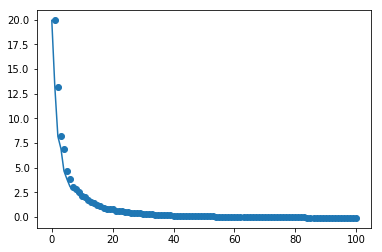

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
# Samples corresponding to the last digit of your roll number (plot a)
indices = []
length = len(train_labels)
for i in range(length):
    if(train_labels[i] == 0):
        indices.append(i)
        
data = []
for i in indices:
    data.append(train_data[i])

cova = np.cov(np.transpose(data))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval=eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

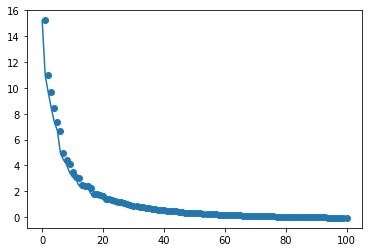

In [4]:
# All training data (plot c)

cova = np.cov(np.transpose(train_data))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval=eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

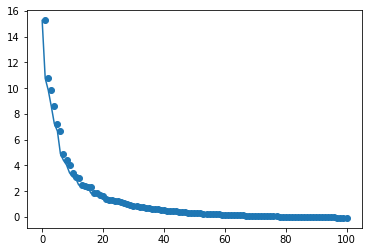

In [5]:
# Randomly selected 50% of the training data (plot d)
import random

indices = []
ctr = 0
while (ctr<3000):
    temp = random.randint(0, 5999)
    if(temp not in indices):
        indices.append(temp)
        ctr = ctr+1
        
data = []
for i in indices:
    data.append(train_data[i])

cova = np.cov(np.transpose(data))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval = eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
plt.plot(eigval[:100])

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
### Plots a and b
- Yes, plots a and b are different. Plot a corresponds to the digit '9' and plot b to the digit '0'. The magnitude of the eigen values are different for both the cases. For instance, the magnitude of the eigen values in plot b is higher, one of them reaching 12.5, and two of them around 7.5. In plot a, the highest magnitude of the eigenvalue is 10, and lots of them are cluttered around 5. 
- We notice in general that the graphs are hyperbolic in shape, with minor variations, for instance, some have a larger quantity of greater eigen values. 

### Plots b and c
Yes, these plots are different too. As we can see, plot b is steeper than plot c, that is, there are a greater number of non zero eigenvalues in plot c as compared to b. This is because in plot c, we are considering all the training data. Since all of them are contributing, we will have a greater number of non zero eigen values. Hence, the difference in the graphs. 

### Approximate Ranks
We find the point when the eigen values almost start becoming zero
- plot a: $\approx$ 25
- plot b: $\approx$20
- plot c: $\approx$30
- plot d: $\approx$30 

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

### Answers

- Possible Images: Since each pixel can have values either 0 or 1, there are 2<sup>784</sup> images possible, because 28x28 = 784.
- Total number of images are 7000. 
\begin{equation*}
    Percentage = \frac{7000}{2^{784}}\times 100 \approx 0
\end{equation*}
- But since only 6000 belong to the training set, and the other are in the test set, we can say that 6000/2<sup>784</sup> images would be accessible 
- The eigen value spectrum would be a straight line of the form y=k, parallel to x-axis because all 784 eigen values would be dominant. Data would be spread uniformly across all the dimensions.

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

### Multiplying by an orthonormal matrix
Even after multiplying with an orthonormal matrix, the eigenvalue spectrum remains the same! When the training data set is multiplied with an orthonormal matrix, it does cause rotation, but the lengths would be preserved. The eigen vectors do change, but not the eigenvalues, because there is no change in length. 

\begin{equation}
    \Sigma = \frac{1}{N} \sum_{i=1}^{N}(x-\mu)(x-\mu)^{T}
\end{equation}

We multiply $x$ with $A$ such that $AA^{T} = I$. Let,

\begin{equation}
    \Sigma^{'} = \frac{1}{N} \sum_{i=1}^{N}(Ax-\mu)(Ax-\mu)^{T}
    {} = \frac{1}{N} \sum_{i=1}^{N}A(x-\mu)(x-\mu)^{T}A^{T}
    {} = A \Sigma A^{T}
\end{equation}

Since $\Sigma^{'}$ and $\Sigma$ are similar therefore the eigen values will be same.



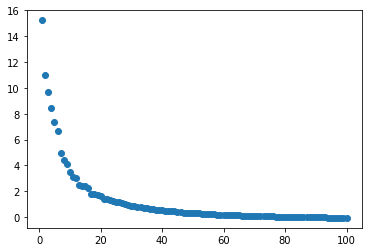

In [70]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
n = 784
H = np.random.rand(n, n)
u, s, v = np.linalg.svd(H, full_matrices=False)
# print(u.shape)
mat = u @ v
new = train_data @ mat
# print(new.shape)

cova = np.cov(np.transpose(new))# because we want (600,784)

eigval,eigvec = np.linalg.eig(cova)
eigval = eigval.real
mean = np.mean(eigval)
std = np.std(eigval)
eigval = (eigval-mean)/std

np.sort(eigval)
xaxis=[]
for i in range(1,101):
    xaxis.append(i)
plt.scatter(xaxis,eigval[:100])
# plt.plot(eigval[:100])

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

### Multiplying by rank deficient matrices:
If the rank of the matrix that we are multiplying with is just 1 or 2, then our samples would decompose into just 1 or 2 dimensions. We would LOSE eigenvalues. There will be onli 1 or 2 non zero eigen values, and rest everything will become zero in our eigen spectrum. So the eigenspectrum would have a very steep drop, and almost all of the values would be zero. 

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

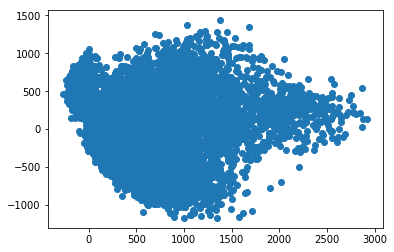

In [71]:
# Plotting code here
cova = np.cov(np.transpose(train_data))
eigval, eigvec =np.linalg.eig(cova)
eigval = eigval.real
top2 = np.argsort(-eigval)[:2]
eval1 = top2[0]
eval2 = top2[1]
evec1 = eigvec.T[eval1]
evec2 = eigvec.T[eval2]
# print(evec1.shape)
xaxis = np.dot(train_data, evec1)
yaxis = np.dot(train_data, evec2)
plt.scatter(xaxis, yaxis)

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [72]:
# Print accuracy on the test set using MLE
cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
# print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
# print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
# print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []
allinverse = []
allconsts = []

for i in finaldata:
    i = np.array(i)#600x25
    cova = np.cov(np.transpose(i))#25x25
    inverse = np.linalg.inv(cova)#25x25
    deter = np.linalg.det(cova)
    means = np.mean(i, axis = 0)#25x1
    const_term = np.divide(1, np.power(2*np.pi,(0.5*30)) * np.power(deter, 0.5))
    allinverse.append(inverse)
    allmeans.append(means)
    allconsts.append(const_term)
    
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]
    results = []
    length2 = len(finaldata)
    for j in range(length2):
        x_minus_mu = cur_testdata - allmeans[j]
        exp_term = -0.5 * np.linalg.multi_dot([x_minus_mu.T, allinverse[j], x_minus_mu])
        final_term = np.exp(exp_term) * allconsts[j]
        results.append(final_term)
    
    MLE_answer = np.argmax(results)
    if(MLE_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)



(10, 600, 30)
94.8


In [73]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

'''
here, we assume our priori probability to be 0.1, that is, P(theta) = 1/10
this is because the classes in our data set are uniformly distributed throughout.
There are 10 classes, 6000 data points, and each class has exactly 6000/10 = 600 data points. 
Hence, we take our prioiri probablity as 0.1
'''

cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
# print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
# print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
# print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []
allinverse = []
allconsts = []

for i in finaldata:
    i = np.array(i)#600x25
    cova = np.cov(np.transpose(i))#25x25
    inverse = np.linalg.inv(cova)#25x25
    deter = np.linalg.det(cova)
    means = np.mean(i, axis = 0)#25x1
    const_term = np.divide(1, np.power(2*np.pi,(0.5*30)) * np.power(deter, 0.5))
    allinverse.append(inverse)
    allmeans.append(means)
    allconsts.append(const_term)
    
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]
    results = []
    length2 = len(finaldata)
    for j in range(length2):
        x_minus_mu = cur_testdata - allmeans[j]
        exp_term = -0.5 * np.linalg.multi_dot([x_minus_mu.T, allinverse[j], x_minus_mu])
        final_term = np.exp(exp_term) * allconsts[j] * 0.1
        results.append(final_term)
    
    MLE_answer = np.argmax(results)
    if(MLE_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)

(10, 600, 30)
94.8


In [74]:
# Print accuracy using Bayesian pairwise majority voting method

cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []
allinverse = []

for i in finaldata:
    i = np.array(i)#600x25
    means = np.mean(i, axis = 0)#25x1
    allmeans.append(means)
    for j in finaldata:
        j = np.array(j)#converting to numpy array
        cova1 = np.cov(np.transpose(i))
        cova2 = np.cov(np.transpose(j))
        cova = (cova1+cova2)/2
        inverse = np.linalg.inv(cova)
        allinverse.append(inverse)
    
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]
    results = np.zeros(10)
    
    length2 = len(finaldata)
    for j in range(length2):
        x_minus_mu1 = cur_testdata - allmeans[j]
        for k in range(length2):
            if(j == k):
                continue;
            x_minus_mu2 = cur_testdata - allmeans[k]
            exp_term1 = np.linalg.multi_dot([x_minus_mu1.T, allinverse[10*j + k], x_minus_mu1])
            exp_term2 = np.linalg.multi_dot([x_minus_mu2.T, allinverse[10*j + k], x_minus_mu2])
            
            if exp_term1 < exp_term2:
                results[j]+=1
            else:
                results[k]+=1
    PM_answer = np.argmax(results)
    if(PM_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)

(784, 784)
(784, 30)
(6000, 30)
(10, 600, 30)
88.4


In [37]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

cova = np.cov(np.transpose(train_data))# because we want (600,784)
eigval,eigvec = np.linalg.eig(cova)
# print(eigvec.shape)

newcova = eigvec[:, :30] #784x25
# print(newcova.shape)

newtest = test_data.dot(newcova)#1000x25
newtrain = train_data.dot(newcova)#6000x25
print(newtrain.shape)

finaldata = []
length = len(train_labels)
for j in range(10):
    indices = []
    data = []
    for i in range(length):
        if(train_labels[i] == j):
            indices.append(i)
    for i in indices:
        data.append(newtrain[i])
    finaldata.append(data)
    
print(np.asarray(finaldata).shape)#10x600x25

allmeans = []

for i in finaldata:
    i = np.array(i)#600x25
    means = np.mean(i, axis = 0)#25x1
    allmeans.append(means)

# print(newtest[1].shape)
acc = 0
length = len(newtest)
for i in range(length):#going through every test data
    cur_testdata = newtest[i]  
    results = []
    length2 = len(finaldata)
    for j in range(length2):
        final_term = np.linalg.norm(cur_testdata - allmeans[j])
        results.append(final_term)
    
    PB_answer = np.argmin(results)
    if(PB_answer)==test_labels[i]:
        acc += 1
        
print(acc/10)

(6000, 30)
(10, 600, 30)
75.3


### 1.3.3 Question 4
Compare performances and salient observations

94.8 
88.4
75.3
- In MAP and MLE, we use a multivariate gaussian distrubution which is very accurate, and hence the accuracy is high. It comes out to be 94.8%. 
- The accuracy for both, MAP and MLE, turn out to be equal because the apriori probability in MAP taken is = 0.1, as the classes occur uniformly in the data set. (Explained at the starting of the code)
- In Pairwise voting method, we compute mahalonobis distance as our distance metric, which is not as accurate, but defintiely more accurate than euclidian distance. The accuracy comes out to be 88.4. We assume that the variance of both the distributions are equal. which is a good enough approximation as the decision boundary is now a line (in place of a quadratic curve).
- And then in perpendicular bisector, we use an extremely rough estimate, which results in low accuracy of 75.3% We calculate euclidian distance as our distance metric. 

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [62]:
# Your code here
# Print accuracies with K = 1, 3, 7
arr = [1,3,7]

x1 = np.square(train_data)
y1 = x1.sum(axis=1)

x2 = np.square(test_data)
y2 = x2.sum(axis=1)

total = y1 + y2[:,np.newaxis]#1000x6000
diff = 2 * np.dot(train_data, test_data.T)#6000x1000
mat = total - diff.T # 1000x6000
# print(mat.shape)

mat2 = []
for row in mat:
    mat2.append(np.argsort(row))

# mat3 = []
# mat2 = ([3,1,2], [5,4,3], [98, 45, 67])
# for i in mat2:
#     mat3.append(np.argsort(i))

for i in arr:
    cor = 0
    for ind2,j in enumerate(mat2):#Getting top k indices
        vals=[]
        arr2=[]
        s1 = j[:i]
        for k in s1:
            vals.append(train_labels[k])
        
        (v1,c1) = np.unique(vals,return_counts = True)
        ind = np.argmax(c1)
        v1 = v1[ind]
        if (v1 == test_labels[ind2]):
            cor+=1
    print(cor/10)

90.7
91.6
91.6


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

### answer 1: comparing the accuracies
- The accuracies are not the same. This is because if there are some values nearby that have the same value, there could also be those that are farther away and have different values from the ones nearby! Moreover, these values that are farther away might be more in frequency as well, resulting in different answers for different k's. For instance if k=1 gives the test label as 5, but if k=5 gives, 5, 5, 7, 7, 7. Then in this case, output is 7 and not 5. 
- A large k value would include points from different classes
- Larger the k, more is the complexity, but then it will me more accurate also. For smaller k, noise cann affect accuracy badly.

### answer 2: getting the best 'k'
- One way to get the best value of k is that we will plot a graph for all values of k and then choose optimal k. For example: we see that k = 5 is optimal after plotting all graphs. 
- We will take a small chunk from the test data and apply the algorithm with different values of k. Whichever gives the best accuracy can be used on the remaining test data. 

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [63]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [64]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
import numpy as np
final_data = np.concatenate((train_data, mixed_data))
# arr = [1,3,7]
k=20

x1 = np.square(final_data)
y1 = x1.sum(axis=1)

total = y1 + y1[:,np.newaxis]#1000x6020
diff = 2 * np.dot(final_data, final_data.T)#6020x1000
mat = total - diff.T # 1000x6020
print(mat.shape)

mat2 = []
for row in mat:
    mat2.append(np.argsort(row))

corr = set()
allvals = set()
for i in range(0, 6020):
    allvals.add(i)

for ind2,j in enumerate(mat2):#Getting top 15 indices
    s1 = j[:15]
    for k in s1:
        if(k!=ind2):
            corr.add(k)
            
print(len(corr))
diff = allvals - corr
print(diff)

(6020, 6020)
5958
{769, 6018, 4355, 1030, 2823, 3590, 5000, 1294, 1682, 916, 1301, 1302, 1047, 4502, 5524, 4634, 539, 4762, 5404, 670, 4127, 3106, 5029, 1448, 4265, 5418, 5673, 5808, 4279, 4792, 318, 704, 4802, 1091, 3268, 4164, 2246, 1097, 2761, 1872, 1875, 340, 854, 5464, 4058, 2268, 2781, 1758, 4066, 995, 1509, 2661, 5863, 4842, 5873, 2034, 2803, 6006, 1402, 3580, 1405, 3582}


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

- Each sample has a variable 'neatness' given by classID/10, that needs to be predicted. Obviously, a point that is nearer to the sample should have more weight and a point farther away should have less wieght. 
- So we can have some sort of an inverse weighted value, for eg, 1/d1 + 1/d2 + .... + 1/dk, which can be used to get the sample's neatness. 
- The implementation is given below. However, due to some error, my multiplication is not happening. I'm running out of time to debug, so submitting it how it is as of now. 

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [61]:
# Your code here
K = 5

x1 = np.square(train_data)
y1 = x1.sum(axis=1)

x2 = np.square(test_data)
y2 = x2.sum(axis=1)

total = y1 + y2[:,np.newaxis] #1000x6000
diff = 2 * np.dot(train_data, test_data.T) #6000x1000
mat = total - diff.T # 1000x6000

#sorting it according to indices
mat2 = []
for row in mat:
    mat2.append(np.argsort(row))
    
mat.sort(axis = 1)
cor = 0
for ind2,j in enumerate(mat2): 
    vals = []
    s1 = j[:K] #Getting top k indices
    for k in s1:
        vals.append(train_labels[k])
    weights = np.divide(1, mat[:,:i])
    weightsum = np.sum(weights, axis=1)#1000x1
    vals = np.array(vals)
    val = np.matmul(weightsum, vals.T)
    
    score = np.divide(val - test_labels, 10)
    print(score)
    
    


ValueError: shapes (1000,) and (5,) not aligned: 1000 (dim 0) != 5 (dim 0)

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---